<a href="https://colab.research.google.com/github/Umesh1307/Medium-Articles/blob/main/Evaluation_of_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
placement_df=pd.read_csv("/content/drive/MyDrive/placement.csv")

In [ ]:
placement_df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [ ]:
placement_df.tail()

,cgpa,package
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96
199,6.22,2.33


In [ ]:
placement_df.shape

(200, 2)

In [ ]:
placement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [ ]:
print(f"The total number of row are {placement_df.shape[0]} and columns {placement_df.shape[1]}")

The total number of row are 200 and columns 2


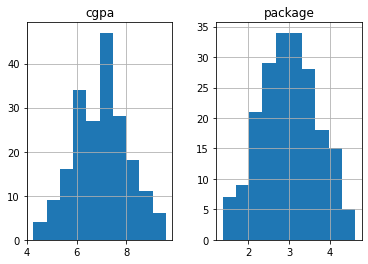

In [ ]:
placement_df.hist()
plt.show()

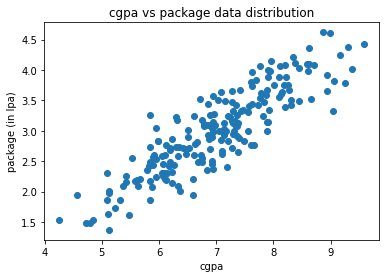

In [ ]:
plt.scatter(data=placement_df, x='cgpa', y='package')
plt.xlabel("cgpa")
plt.ylabel("package (in lpa)")
plt.title("cgpa vs package data distribution")
plt.show()

In [ ]:
X=placement_df.iloc[:,0:1]

In [ ]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [ ]:
y=placement_df.iloc[:,-1]

In [ ]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr

LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

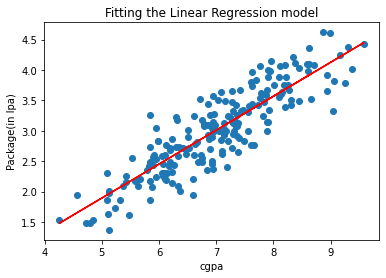

In [ ]:
plt.scatter(placement_df['cgpa'],placement_df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('cgpa')
plt.ylabel('Package(in lpa)')
plt.title("Fitting the Linear Regression model")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [ ]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [ ]:
print(f"Mean Absolute Error is : {mean_absolute_error(y_test, y_pred).round(3)} LPA")

Mean Absolute Error is : 0.288 LPA


In [ ]:
print(f"The mean squared error is : {mean_squared_error(y_test, y_pred).round(3)}")

The mean squared error is : 0.121


In [ ]:
print(f"The R2 Score is: {r2_score(y_test, y_pred).round(3)}")

The R2 Score is: 0.781


In [ ]:
print(f"Root Mean Squared Error is : {np.sqrt(mean_squared_error(y_test, y_pred)).round(3)} LPA")

Root Mean Squared Error is : 0.348 LPA


In [ ]:
X_test.shape

(40, 1)

In [ ]:
r2=r2_score(y_test, y_pred)
r2

0.780730147510384

In [ ]:
adjusted_r2_score=1-((1-r2)*(40-1)/(40-1-1))

In [ ]:
adjusted_r2_score

0.7749598882343415

In [ ]:
new_df1 = placement_df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.411096,3.26
1,5.12,0.532574,1.98
2,7.82,0.434232,3.25
3,7.42,0.898066,3.67
4,6.94,0.068021,3.57


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=new_df1.iloc[:,0:2]

In [ ]:
y=new_df1.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

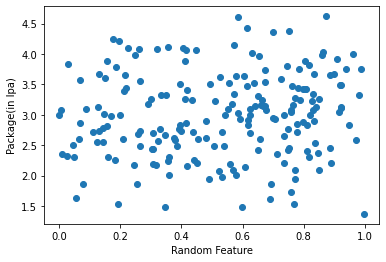

In [ ]:
plt.scatter(new_df1['random_feature'],placement_df['package'])
plt.xlabel('Random Feature')
plt.ylabel('Package(in lpa)')
plt.show()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
print(f"Mean Absolute Error is : {mean_absolute_error(y_test, y_pred).round(2)}")

Mean Absolute Error is : 0.29


In [ ]:
print(f"Mean Squared Error is : {mean_squared_error(y_test, y_pred).round(2)}")

Mean Squared Error is : 0.12


In [ ]:
print(f"Root Mean Squared Error is : {np.sqrt(mean_squared_error(y_test, y_pred)).round(2)}")

Root Mean Squared Error is : 0.35


In [ ]:
print(f"The r2 score is : {r2_score(y_test, y_pred).round(2)}")

The r2 score is : 0.78


In [ ]:
r2=r2_score(y_test, y_pred)

In [ ]:
r2

0.7815402697254608

In [ ]:
X_test.shape

(40, 2)

In [ ]:
X_train.shape

(160, 2)

In [ ]:
n=40                                            # Number of Observation (Rows)

k=2                                             # Number of features (Columns)

r2=r2_score(y_test, y_pred)                     # R2 Squared Score


adjusted_r2_score=1-((1-r2)*(n-1)/(n-k-1))      # Calculating Adjusted R2 Score

print(f"The Adjusted R2 Score is : {adjusted_r2_score.round(4)}")

The Adjusted R2 Score is : 0.7697


In [ ]:
adjusted_r2_score

0.7697316356565668